In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_data_upload (1).csv to diabetes_data_upload (1).csv


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
# Read the dataset
diabetes = pd.read_csv("/content/diabetes_data_upload (1).csv")

In [ ]:
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create the column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["Age"]),
    (OneHotEncoder(handle_unknown="ignore"), ["Gender", "Polyuria", "Polydipsia", "sudden weight loss", "weakness", "Polyphagia", "Genital thrush",
                                              "visual blurring", "Itching", "Irritability", "delayed healing", "partial paresis", "muscle stiffness",
                                              "Alopecia", "Obesity"])
)

# Create X & y
X = diabetes.drop("class", axis=1)
y = diabetes["class"]

# Building traning and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit column transformer on the training set
ct.fit(X_train)

# Transform training & test data with MinMaxScaler & One Hot Encoding
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal.shape, y_train.shape

((364, 31), (364,))

In [ ]:
def one_hot(array):
  one_hot_array = []
  for val in array:
    if val == "Positive":
      one_hot_array.append(1)
    else:
      one_hot_array.append(0)
  return one_hot_array

In [ ]:
y_train = np.array(one_hot(y_train))
y_test = np.array(one_hot(y_test))

In [ ]:
# Random seed for reproducibility
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(31, )),
  tf.keras.layers.Dense(16, activation="relu", name="hidden_layer_1"),
  tf.keras.layers.Dense(16, activation="relu", name="hidden_layer_2"),
  tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")
], name="Diabetes_Model")

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["accuracy"])

# Fit the model
history = model.fit(X_train_normal, y_train, epochs=100, verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 4ms/step - loss: 0.7861 - accuracy: 0.3324
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7021 - accuracy: 0.5192
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6437 - accuracy: 0.6621
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6030 - accuracy: 0.7198
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5613 - accuracy: 0.7280
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5172 - accuracy: 0.7473
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7885
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4241 - accuracy: 0.8187
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8379
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3438 - accuracy: 0.8324
Epoch 11/

In [ ]:
# Show model parameters
model.summary()

Model: "Diabetes_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 31)                0         
                                                                 
 hidden_layer_1 (Dense)      (None, 16)                512       
                                                                 
 hidden_layer_2 (Dense)      (None, 16)                272       
                                                                 
 output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


Text(0, 0.5, 'Loss')

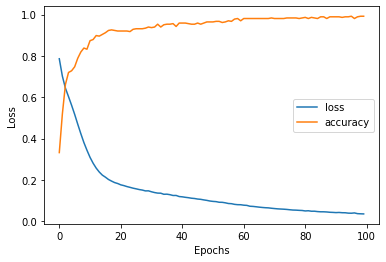

In [ ]:
# Plot the loss curve
pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")

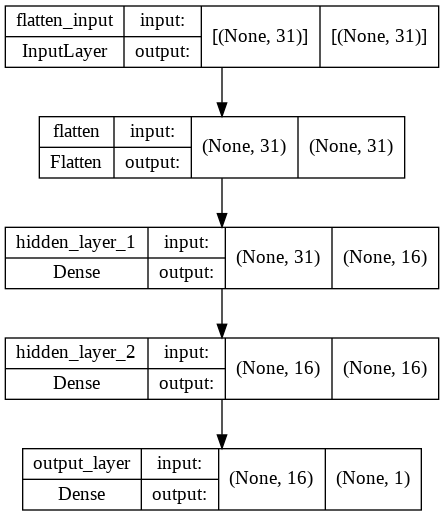

In [ ]:
# Visualize the model
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [ ]:
# Evaluate the model
model.evaluate(X_test_normal, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.9808


[0.0593617707490921, 0.9807692170143127]

In [ ]:
# Save the model in SavedModel format
model.save("diabetes_model")

INFO:tensorflow:Assets written to: diabetes_model/assets


In [ ]:
# Save the model in HDF5 format
model.save("diabetes_model.h5")

In [ ]:
# Use this code to load the model in SavedModel format
# loaded_model = tf.keras.models.load_model("diabetes_model")
# loaded_model.summary()

In [ ]:
# Use this code to load the model in HDF5 format
# loaded_model = tf.keras.models.load_model("diabetes_model.h5")
# loaded_model.summary()